# Homework 4: Neural Networks, SGD, and Back Propagation 
***

**Name**: Max Lambek

***

This assignment is due on Moodle by **5pm on Friday March 23rd**. Your solutions to theoretical questions should be done in Markdown/MathJax directly below the associated question.  Your solutions to computational questions should include any specified Python code and results as well as written commentary on your conclusions.  Remember that you are encouraged to discuss the problems with your instructors and classmates, but **you must write all code and solutions on your own**.  For a refresher on the course **Collaboration Policy** click [here](https://github.com/chrisketelsen/CSCI-4622-Machine-Learning/blob/master/resources/syllabus.md#collaboration-policy).

**NOTES**: 

- Do **NOT** load or use any Python packages that are not available in Anaconda 3.6. 
- Some problems with code may be autograded.  If we provide a function API **do not** change it.  If we do not provide a function API then you're free to structure your code however you like. 
- Submit only this Jupyter notebook to Moodle.  Do not compress it using tar, rar, zip, etc. 

In [153]:
import pickle, gzip
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
%matplotlib inline

### [15 points] Problem 1 - Single-Layer and Multilayer Perceptron Learning 
***

**Part A**: Consider learning the following concepts with either a single-layer or multilayer perceptron where all hidden and output neurons utilize indicator activation functions.  For each of the following concepts, state whether the concept can be learned by a single-layer perceptron.  **Briefly** justify your response: 

i. $~ \texttt{ NOT } x_1$ 

ii. $~~x_1 \texttt{ NOR } x_2$ 

iii. $~~x_1 \texttt{ XNOR } x_2$ 


i. Yes because all you need is to use $-1$ as your weight to change the sign of the inputs.

ii. Yes because $x_1$ NOR $x_2$ is just the negation of OR, which is a linearly seperable, as shown in class, and as such can be learned by a single-layer perceptron.

iii. No because $x_1$ XNOR $x_2$ is the same as NOT($x_1$ OR $x_2$) OR ($x_1$ AND $x_2$), which has the same problems as an XOR gate (not linearly seperable), and thus it cannot be learned by a single-layer perceptron. However, this can be done by a multi-layer perceptron.

**Part B**: Determine an architecture and specific values of the weights and biases in a single-layer or multilayer perceptron with indicator activation functions that can learn $x_1 \texttt{ XNOR } x_2$. Describe your architecture and state your weight matrices and bias vectors in Markdown below. Then demonstrate that your solution is correct by implementing forward propagation for your network in Python and showing that it correctly produces the correct boolean output values for each of the four possible combinations of $x_1$ and $x_2$.  

the XNOR operator can be formed by using a 2-layer perceptron with 2 nodes and a bias node on each layer. Structuring the inputs into the second layer as the top node is a NOR operator and the bottom node is an AND operator, and then ORing those two nodes produces XNONR. The weights needed to do this is:


$$W^1 = 
\begin{bmatrix}
1 & 1 \\
-1 & -1
\end{bmatrix},
b^1 = 
\begin{bmatrix}
-1 \\
1
\end{bmatrix},
W^2 =
\begin{bmatrix}
1 & 1 \\
\end{bmatrix},
b^2 = 
\begin{bmatrix}
0
\end{bmatrix},
$$


In [154]:
W1 = [[1,1],[-1,-1]]
W2 = [1,1]
b1 = [-1,1]
def XNOR(x1,x2):
    a1 = np.dot(W1[0],[x1,x2])+b1[0]
    if(a1 < 1):
        a1 =0
    #print(a1)
    a2 = np.dot(W1[1],[x1,x2])+b1[1]
    if(a2 < 1):
        a2 = 0
    #print(a2)
    
    ans = np.dot(W2,[a1,a2])
    return ans
a = XNOR(0,0)
print("zero zero case result:", a)
a = XNOR(0,1)
print("zero one case result:", a)
a = XNOR(1,0)
print("one zero case result:", a)
a = XNOR(1,1)
print("one one case result:", a)


zero zero case result: 1
zero one case result: 0
one zero case result: 0
one one case result: 1


### [20 points] Problem 2 - Back Propagation and Deep Networks
***

In this problem you'll gain some intuition about why training deep neural networks can be very time consuming.  Consider training the chain-like neural network seen below: 

![chain-like nn](figs/chain_net.png)

Note that this network has three weights $W^1, W^2, W^3$ and three biases $b^1, b^2,$ and $b^3$ (for this problem you can think of each parameter as a single value or as a $1 \times 1$ matrix). Suppose that each hidden and output neuron is equipped with a sigmoid activation function and the loss function is given by 

$$
C(y, a^4) = \frac{1}{2}(y - a^4)^2  
$$

where $a^4$ is the value of the activation at the output neuron and $y \in \{0,1\}$ is the true label associated with the training example. 

**Part A**: Suppose each of the weights is initialized to $W^k = 1.0$ and each bias is initialized to $b^k = -0.5$.  Use forward propagation to find the activities and activations associated with each hidden and output neuron for the training example $(x, y) = (0.5,0)$. Show your work. 

$a^2= sigm(0.5*1+(-0.5)) = 0.5 $, $a^3= sigm(0.5*1+(-0.5)) = 0.5 $, $a^4= sigm(0.5*1+(-0.5)) = 0.5 $


**Part B**: Compute the value of $\delta^4$ associated with the given training example. Show all work.  

$$\delta^L = \frac{\partial C}{\partial z_i^L} = \nabla_{\mathbf{a}^L} C \odot g^{\prime} (\mathbf{z}^L) $$
$$\frac{\partial C}{\partial a^L} = (y-a^L)(-1) = a^L - y $$
$$\delta_4 = \frac{\partial C}{\partial z_1^1} = \frac{\partial C}{\partial a_1^1} \frac{\partial a_1^1}{\partial z_1^1} = (a^L - y) sigm^{\prime}(z_1^1) = sigm(z_1^1) sigm^{\prime}(z_1^1)  = \frac{1}{2} \frac{1}{4} = \frac{1}{8} $$

$$\delta_3 = \frac{\partial C}{\partial a_1^1}\frac{\partial a_1^1}{\partial z_1^1}\frac{\partial a_1^2}{\partial z_1^2} = \frac{1}{2} \frac{1}{4} \frac{1}{4} = \frac{1}{32}$$
Following this we can see an obvious trend sence each activation is $0.5$ and each derivative of the activation is $0.25$ so,
$$\delta_2 = \frac{1}{2} \frac{1}{4} \frac{1}{4} \frac{1}{4}  = \frac{1}{32*4} $$

**Part C**: Use Back-Propagation to compute the weight and bias derivatives $\partial C / \partial W^k$ and $\partial C / \partial b^k$ for $k=1, 2, 3$.  Show all work. 

$$\frac{\partial C}{\partial W^3} = \delta^4 a^3 = \frac{1}{8} \frac{1}{2} = 0.0625  $$
$$\frac{\partial C}{\partial W^2} = \delta^3 a^2 = \frac{1}{32} \frac{1}{2} = 0.015625  $$
$$\frac{\partial C}{\partial W^1} = \delta^2 a^1 = \frac{1}{128} \frac{1}{2} = 0.00390625  $$

$$\frac{\partial C}{\partial b^3}= \delta^4 = \frac{1}{8}$$
$$\frac{\partial C}{\partial b^2}= \delta^3 = \frac{1}{32}$$
$$\frac{\partial C}{\partial b^1}= \delta^2 = \frac{1}{128}$$

**Part D**: Comment on your observations in **Part C**.  In particular, compare the rate at which weights will be learned in the earlier layers to the later layers.  What would happen if we had an even deeper network? 

The earlier layers learn at a much slower rate compared to the later layers. In a deeper network this will become even more extreme, and thus fully training all layers will be done at the rate of the first layer, and that might take a long time.

### [40 points] Problem 3: Building and Training a Feed-Forward Neural Network 
***

In this problem you'll implement a general feed-forward neural network class that utilizes sigmoid activation functions. Your tasks will be to implement `forward propagation`, `prediction`, `back propagation`, and a general `train` routine to learn the weights in your network via Stochastic Gradient Descent.  

The skeleton for the `Network` class is below. Note that this class is almost identical to the one you worked with in the **Hands-On Neural Network** in-class notebook, so you should look there to remind yourself of the details.   Scroll down to find more information about your tasks as well as unit tests. 

**Important Note**: In **Problem 4** we'll be using the `Network` class to train a network to do handwritten digit recognition.  Please make sure to utilize vectorized Numpy routines as much as possible, as writing inefficient code here will cause very slow training times in **Problem 4**. 

In [373]:
class Network:
    def __init__(self, sizes):
        """
        Initialize the neural network 
        
        :param sizes: a list of the number of neurons in each layer 
        """
        # save the number of layers in the network 
        self.L = len(sizes) 
        
        # store the list of layer sizes 
        self.sizes = sizes  
        
        # initialize the bias vectors for each hidden and output layer 
        self.b = [np.random.randn(n) for n in self.sizes[1:]]
        
        # initialize the matrices of weights for each hidden and output layer 
        self.W = [np.random.randn(n, m) for (m,n) in zip(self.sizes[:-1], self.sizes[1:])]
        
        # initialize the derivatives of biases for backprop 
        self.db = [np.zeros(n) for n in self.sizes[1:]]
        
        # initialize the derivatives of weights for backprop 
        self.dW = [np.zeros((n, m)) for (m,n) in zip(self.sizes[:-1], self.sizes[1:])]
        
        # initialize the activities on each hidden and output layer 
        self.z = [np.zeros(n) for n in self.sizes]
        
        # initialize the activations on each hidden and output layer 
        self.a = [np.zeros(n) for n in self.sizes]
        
        # initialize the deltas on each hidden and output layer 
        self.delta = [np.zeros(n) for n in self.sizes]
        
        self.acc = []
        self.vacc = []
        
    def g(self, z):
        """
        sigmoid activation function 
        
        :param z: vector of activities to apply activation to 
        """
        z = np.clip(z, -20, 20)
        return 1.0/(1.0 + np.exp(-z))
    
    def g_prime(self, z):
        """
        derivative of sigmoid activation function 
        
        :param z: vector of activities to apply derivative of activation to 
        """
        return self.g(z) * (1.0 - self.g(z))
    
    def gradC(self, a, y):
        """
        evaluate gradient of cost function for squared-loss C(a,y) = (a-y)^2/2 
        
        :param a: activations on output layer 
        :param y: vector-encoded label 
        """
        return (a - y)
    
    def forward_prop(self, x):
        """
        take a feature vector and propagate through network 
        
        :param x: input feature vector 
        """
        
        # Initialize activation on initial layer to x 
        self.a[0] = x 
        #print(self.sizes)
        #print(len(self.W[0]))
        #print(len(self.a[1]))
        # Loop over layers and compute activities and activations 
        for ii in range(self.L-1):
            self.z[ii+1] = np.dot(self.W[ii],self.a[ii]) + self.b[ii]
            self.a[ii+1] = self.g(self.z[ii+1])
            
            
        self.a = self.a
        
    def predict(self, X):
        """
        Predicts on the the data in X. Assume at least two output neurons so predictions
        are one-hot encoded vectorized labels. 
        
        :param X: a matrix of data to make predictions on 
        :return y: a matrix of vectorized labels 
        """
        #print(X[0][0])
        #self.forward_prop(X[0])
        #print(self.a)
        yhat = np.zeros((X.shape[0], self.sizes[-1]), dtype=int)
        #print(self.sizes)
        #print(X)
        #self.forward_prop(X[0])
        for ii in range(X.shape[0]):
            #print(ii)
            #best = self.a[-1].argsort()
            self.forward_prop(X[ii])
            best = np.argmax(self.a[-1])
            #print(best)
            yhat[ii][best] = 1
            
        #print(yhat)
        #for ii in range(len(X))
        #classes = self.sizes[-1] +1
        #yhat = np.zeros((len(X_train),classes))
        #yhat = np.eye(classes)[np.ravel(X).astype(int)]
        #print(yhat[0])
                
        return yhat 
    
    def accuracy(self, X, y):
        """
        compute accuracy on labeled training set 

        :param X: matrix of features 
        :param y: matrix of vectorized true labels 
        """
        yhat = self.predict(X)
        return np.sum(np.all(np.equal(yhat, y), axis=1)) / X.shape[0]
            
            
    def back_prop(self, x, y):
        """
        Back propagation to get derivatives of C wrt weights and biases for given training example
        
        :param x: training features  
        :param y: vector-encoded label 
        """
        
        # forward prop training example to fill in activities and activations 
        self.forward_prop(x)
        # compute deltas on output layer 
        # TODO 
        self.delta[-1] = (self.gradC(self.a[-1], y)*self.g_prime(self.z[-1]))
        #print(self.delta[-1])
        # loop backward through layers, backprop deltas, compute dWs and dbs
        
        for ll in range(self.L-2, -1, -1):
            #print(np.outer(self.delta[ll+1],(self.a[ll])))
            self.dW[ll] = np.outer(self.delta[ll+1],(self.a[ll]))
            self.db[ll] = self.delta[ll+1]
            self.delta[ll] = np.dot(self.W[ll].transpose(), self.delta[ll+1]) *self.g_prime(self.z[ll])
            
            
    def train(self, X_train, y_train, X_valid=None, y_valid=None, eta=0.25, lam=0.0, num_epochs=10, isPrint=True):
        """
        Train the network with SGD 
        
        :param X_train: matrix of training features 
        :param y_train: matrix of vector-encoded training labels 
        :param X_train: optional matrix of validation features 
        :param y_train: optional matrix of vector-encoded validation labels 
        :param eta: learning rate 
        :param lam: regularization strength 
        :param num_epochs: number of epochs to run 
        :param isPrint: flag indicating to print training progress or not 
        """
        
        # initialize shuffled indices 
        shuffled_inds = list(range(X_train.shape[0]))
        
        # loop over training epochs 
        for ep in range(num_epochs):
            
            # shuffle indices 
            np.random.shuffle(shuffled_inds)
            
            # loop over training examples 
            for ind in shuffled_inds:
                
                # back prop to get derivatives 
                #print(ind)
                self.back_prop(X_train[ind,:],y_train[ind,:])
                
                # update weights and biases 
                self.W = [Wll - eta*(dWll + lam*Wll) for Wll, dWll in zip(self.W, self.dW)]
                self.b = [bll - eta*dbll for bll, dbll in zip(self.b, self.db)]
                
            #store acc values
            if isPrint and ((ep+1)%5)==1:
                #self.acc = self.acc + [self.accuracy(X_train, y_train)]
                self.vacc = self.vacc + [self.accuracy(X_valid, y_valid)]
            # occasionally print accuracy
            if isPrint and ((ep+1)%10)==1:
                self.epoch_report(ep, num_epochs, X_train, y_train, X_valid, y_valid)
                
        # print final accuracy
        if isPrint:
            self.vacc = self.vacc + [self.accuracy(X_valid, y_valid)]
            self.epoch_report(ep, num_epochs, X_train, y_train, X_valid, y_valid)
                
                    
    def epoch_report(self, ep, num_epochs, X_train, y_train, X_valid, y_valid):
        """
        Print the accuracy for the given epoch on training and validation data 
        
        :param ep: the current epoch 
        :param num_epochs: the total number of epochs
        :param X_train: matrix of training features 
        :param y_train: matrix of vector-encoded training labels 
        :param X_train: optional matrix of validation features 
        :param y_train: optional matrix of vector-encoded validation labels 
        """
        
        print("epoch {:3d}/{:3d}: ".format(ep+1, num_epochs), end="")
        print("  train acc: {:8.3f}".format(self.accuracy(X_train, y_train)), end="")
        if X_valid is not None: print("  valid acc: {:8.3f}".format(self.accuracy(X_valid, y_valid)))
        else: print("")   
    

**Part A**: Complete the `forward_prop` function in the `Network` class to implement forward propagation.  Your function should take in a single training example `x` and propagate it forward in the network, setting the activations and activities on the hidden and output layers.  When you think you're done, execute the following unit test. 

In [374]:
%run -i tests/tests.py "prob 3A"

testForwardProp (__main__.TestNN) ... ok

----------------------------------------------------------------------
Ran 1 test in 0.002s

OK


**Part B**: Complete the `predict` function in the `Network` class to take in a matrix of features and return a matrix of one-hot-encoded label predictions. Your predictions should correspond to the output neuron with the largest activation.   

Recall that our convention for encoding, e.g. the label $y=2$ in a classification problem with possible labels $y \in \{0,1,2,3\}$ is 

$$
y=2 \quad \Leftrightarrow \quad y=\left[0, 0, 1, 0\right]
$$

So the equivalent matrix associated with the labels $y_1=3, y_2=2, y_3=0$ is 

$$
y = \begin{bmatrix}{3\\2\\0}\end{bmatrix} \quad \Leftrightarrow \quad 
y = \begin{bmatrix}
0 & 0 & 0 & 1 \\
0 & 0 & 1 & 0 \\
1 & 0 & 0 & 0 
\end{bmatrix}
$$

When you think your `predict` function is working well, execute the following unit test. 


In [375]:
%run -i tests/tests.py "prob 3B"

testPredict (__main__.TestNN) ... ok

----------------------------------------------------------------------
Ran 1 test in 0.003s

OK


**Part C**: OK, now it's time to implement back propagation.  Complete the function ``back_prop`` in the ``Network`` class to use a single training example to compute the derivatives of the loss function with respect to the weights and the biases. As in the **Hands-On** notebook, you may assume that the loss function for a single training example is given by 

$$
C(y, {\bf a}^L) = \frac{1}{2}\|y - {\bf a}^L\|^2  
$$

When you think you're done, execute the following unit test. 

In [376]:
%run -i tests/tests.py "prob 3C"

testBackProp (__main__.TestNN) ... ok

----------------------------------------------------------------------
Ran 1 test in 0.007s

OK


**Part D**: OK, now let's actually train a neural net!  Complete the missing code in ``train`` to loop over the training data in random order, call `back_prop` to get the derivatives, and then update the weights and the biases via SGD.  When you think you're done, execute the following code

In [377]:
%run -i tests/tests.py "prob 3D"

testSGD (__main__.TestNN) ... ok

----------------------------------------------------------------------
Ran 1 test in 0.013s

OK


**Part E**: Last but not least, we should implement $\ell$-$2$ regularization.  Modify your `train` function to incorporate regularization of the weights (but **not** the biases) in your SGD update.  As in the Lecture 18 slides, you should assume that the cost function with regularization takes the form 

$$
C_\lambda = C + \frac{\lambda}{2} \displaystyle\sum_{w} w^2
$$

where $\sum_{w}$ sums over each weight in all layers of the network. Think carefully before you go making large changes to your code.  This modification is much simpler than you think. When you think you're done, execute the following unit test.  (Then go back and execute the test in **Part C** to make sure you didn't break anything.) 

In [378]:
%run -i tests/tests.py "prob 3E"

testRegularizedSGD (__main__.TestNN) ... ok

----------------------------------------------------------------------
Ran 1 test in 0.014s

OK


### [25 points] Problem 4: A Neural Network Classifier for Handwritten Digit Recognition 
***

In this problem you'll use the Feed-Forward Neural Network framework you wrote in **Problem 3** to take an image of a handwritten digit and predict which digit it corresponds to.  

![Samples of Handwritten Digits](figs/mnist.png "MNIST Digits")

To keep run times down we'll again only consider the subset of the MNIST data set consisting of the digits $3, 7, 8$ and $9$. 

**Part A**: Executing the following cells will load training and validation data and plot an example handwritten digit.  Explore the training and validation sets and answer the following questions: 

- How many pixels are in each image in the data set?  
- How do the true labels correspond to the associated one-hot-encoded label vectors? 
- Give an example of a network architecture with a single hidden layer that is compatible with this data. 


In [366]:
X_train, y_train, X_valid, y_valid = pickle.load(gzip.open("data/mnist21x21_3789_one_hot.pklz", "rb"))

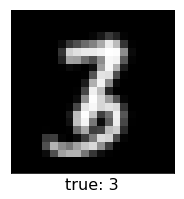

In [367]:
def view_digit(x, label=None):
    fig = plt.figure(figsize=(3,3))
    plt.imshow(x.reshape(21,21), cmap='gray');
    plt.xticks([]); plt.yticks([]);
    if label: plt.xlabel("true: {}".format(label), fontsize=16)
        
training_index = 2
label_dict = dict({0:3, 1:7, 2:8, 3:9})
view_digit(X_train[training_index], label_dict[np.argmax(y_train[training_index])])

In [416]:
print(len(X_train[0])) #number of pixels
print(len(X_train[3]))
print(y_train[0])
print(y_train[1])


441
441
[0 1 0 0]
[0 0 0 1]


There are 441 pixels in each image in the dataset so I will need 441 input neurons in order to put the images into a network.

The true labels are structured into the one-hot-encoded label vectors as a true label of $0$ creates a vector of $[1,0,0,0]$, a true label of 1 creates a vector of $[0,1,0,0]$ and so on.

A network architecture that would work with this would be 441 input neurons, 4 output neurons, and the hidden layer can be any number of neurons. So, one example would be 441 input, 50 hidden, 4 output.

**Part B**: Train a network with a single hidden layer containing $30$ neurons on the first $500$ training examples in the training set using a learning rate of $\eta = 0.01$ for at least $50$ epochs.  What accuracy does your network achieve on the validation set?  Do you see any clear signs of overfitting?   

In [359]:
mynet = Network([441,30,4])
mynet.train(X_train[0:500], y_train[0:500],X_valid,y_valid,eta=0.01, num_epochs=50 )

#mynet.train(X_train = X_train, y_train = y_train, X_valid = X_valid, y_valid = y_valid,eta=0.01, num_epochs=50 )
#def train(self, X_train, y_train, X_valid=None, y_valid=None, eta=0.25, lam=0.0, num_epochs=10, isPrint=True):


epoch   1/ 50:   train acc:    0.278  valid acc:    0.254
epoch  11/ 50:   train acc:    0.276  valid acc:    0.250
epoch  21/ 50:   train acc:    0.574  valid acc:    0.507
epoch  31/ 50:   train acc:    0.788  valid acc:    0.727
epoch  41/ 50:   train acc:    0.844  valid acc:    0.789
epoch  50/ 50:   train acc:    0.868  valid acc:    0.818


My network achieves a validation accuracy of $81.8%$ which is pretty bad but, considering both the training accuracy and validation accuracy were still going up this isn't too bad since no overfitting has happened yet, and there are no signs of overfitting yet.

**Part C**: Modify the `Network` class so that it stores the accuracies on the training and validation data every $5$ epochs during the training process. Now increase the number of neurons in the hidden layer to $100$.  On a single set of axes, plot the **validation accuracy** vs epoch for networks trained on the full training set for at least 50 epochs using the learning rates $\eta = 0.01$, $\eta = 0.25$ and $\eta = 1.5$.  Which learning rate seems to perform the best? What is the best accuracy achieved on the validation set?   

In [379]:
mynet1 = Network([441,100,4])
mynet1.train(X_train, y_train,X_valid,y_valid,eta=0.01, num_epochs=50 )

mynet2 = Network([441,100,4])
mynet2.train(X_train, y_train,X_valid,y_valid,eta=0.25, num_epochs=50 )

mynet3 = Network([441,100,4])
mynet3.train(X_train, y_train,X_valid,y_valid,eta=1.5, num_epochs=50 )

epoch   1/ 50:   train acc:    0.567  valid acc:    0.581
epoch  11/ 50:   train acc:    0.910  valid acc:    0.893
epoch  21/ 50:   train acc:    0.933  valid acc:    0.909
epoch  31/ 50:   train acc:    0.942  valid acc:    0.919
epoch  41/ 50:   train acc:    0.953  valid acc:    0.925
epoch  50/ 50:   train acc:    0.957  valid acc:    0.929
epoch   1/ 50:   train acc:    0.919  valid acc:    0.906
epoch  11/ 50:   train acc:    0.979  valid acc:    0.942
epoch  21/ 50:   train acc:    0.988  valid acc:    0.954
epoch  31/ 50:   train acc:    0.990  valid acc:    0.952
epoch  41/ 50:   train acc:    0.991  valid acc:    0.955
epoch  50/ 50:   train acc:    0.993  valid acc:    0.952
epoch   1/ 50:   train acc:    0.931  valid acc:    0.924
epoch  11/ 50:   train acc:    0.952  valid acc:    0.934
epoch  21/ 50:   train acc:    0.978  valid acc:    0.953
epoch  31/ 50:   train acc:    0.986  valid acc:    0.953
epoch  41/ 50:   train acc:    0.988  valid acc:    0.959
epoch  50/ 50:

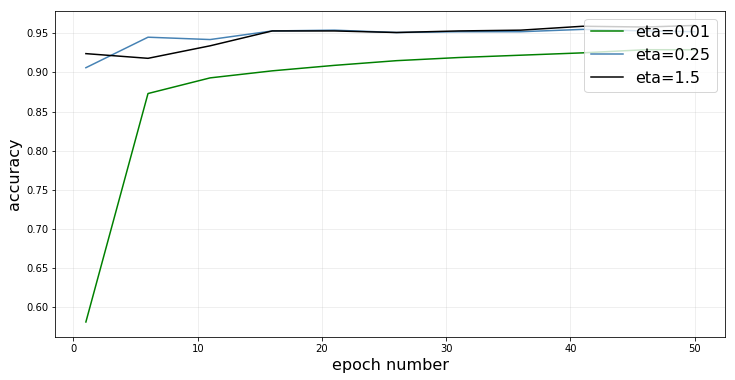

In [386]:

validacc = mynet1.vacc #MSE_hist(X_train, y_train, bhist)

epochs = [1,6,11,16,21,26,31,36,41,46,50] #MSE_hist(X_valid, y_valid, bhist)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12,6))
ax.plot(epochs,validacc, color = "green", label="eta=0.01")
ax.plot(epochs,mynet2.vacc, color = "steelblue", label="eta=0.25")
ax.plot(epochs,mynet3.vacc, color = "black", label="eta=1.5")

#ax.plot(mse_valid,color = "steelblue", label="valid")
#ax.plot(range(1,len(mse_valid)+1), mse_valid, color="green", label="train")
#ax.plot(range(1,len(mse_train)+1), mse_train, color="steelblue", label="train")
ax.set_xlabel("epoch number", fontsize=16)
ax.set_ylabel("accuracy", fontsize=16);
ax.grid(alpha=0.25)
ax.legend(loc="upper right", fontsize=16);

$\eta = 1.5$ is slightly better than $\eta = 0.25$ with final validation accuracies of $95.2%$ and $96.0%$ respectively. However, form my previous knowledge of how learning rates work I am probably better off with the smaller value when I start changing $\lambda$.

**Part D**:  Now let's see if we can get better results with regularization. Using the best learning rate you found in **Part C**, on a single set of axes, plot the **validation accuracy** vs epoch for networks trained on the full training set for at least 50 epochs using the regularization strengths $\lambda = 10^{-6}$, $\lambda = 10^{-4}$ and $\lambda = 10^{-2}$.  Which regularization strength seems to perform the best? What is the best accuracy achieved on the validation set?   

In [412]:
nn1 = Network([441,100,4])
nn1.train(X_train, y_train,X_valid,y_valid,eta=0.25, num_epochs=50, lam = 1e-6 )

nn2 = Network([441,100,4])
nn2.train(X_train, y_train,X_valid,y_valid,eta=0.25, num_epochs=50,lam = 1e-4 )

nn3 = Network([441,100,4])
nn3.train(X_train, y_train,X_valid,y_valid,eta=0.25, num_epochs=50, lam = 1e-2 )

epoch   1/ 50:   train acc:    0.911  valid acc:    0.900
epoch  11/ 50:   train acc:    0.981  valid acc:    0.942
epoch  21/ 50:   train acc:    0.991  valid acc:    0.957
epoch  31/ 50:   train acc:    0.992  valid acc:    0.958
epoch  41/ 50:   train acc:    0.993  valid acc:    0.957
epoch  50/ 50:   train acc:    0.993  valid acc:    0.958
epoch   1/ 50:   train acc:    0.927  valid acc:    0.904
epoch  11/ 50:   train acc:    0.975  valid acc:    0.949
epoch  21/ 50:   train acc:    0.989  valid acc:    0.966
epoch  31/ 50:   train acc:    0.991  valid acc:    0.960
epoch  41/ 50:   train acc:    0.988  valid acc:    0.961
epoch  50/ 50:   train acc:    0.991  valid acc:    0.965
epoch   1/ 50:   train acc:    0.399  valid acc:    0.410
epoch  11/ 50:   train acc:    0.873  valid acc:    0.867
epoch  21/ 50:   train acc:    0.807  valid acc:    0.808
epoch  31/ 50:   train acc:    0.770  valid acc:    0.748
epoch  41/ 50:   train acc:    0.669  valid acc:    0.663
epoch  50/ 50:

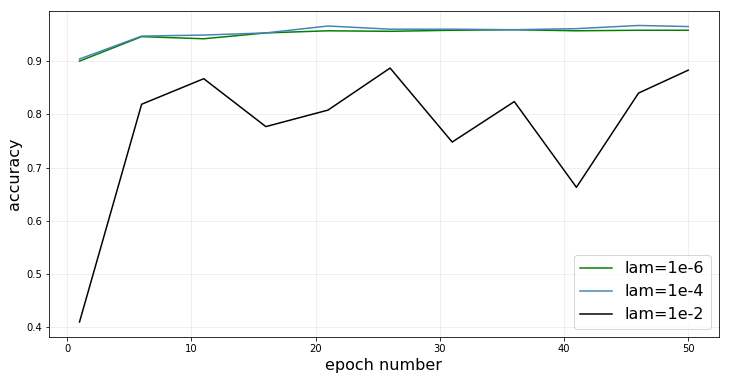

In [413]:
validacc = nn1.vacc #MSE_hist(X_train, y_train, bhist)

epochs = [1,6,11,16,21,26,31,36,41,46,50] #MSE_hist(X_valid, y_valid, bhist)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12,6))
ax.plot(epochs,validacc, color = "green", label="lam=1e-6")
ax.plot(epochs,nn2.vacc, color = "steelblue", label="lam=1e-4")
ax.plot(epochs,nn3.vacc, color = "black", label="lam=1e-2")

#ax.plot(mse_valid,color = "steelblue", label="valid")
#ax.plot(range(1,len(mse_valid)+1), mse_valid, color="green", label="train")
#ax.plot(range(1,len(mse_train)+1), mse_train, color="steelblue", label="train")
ax.set_xlabel("epoch number", fontsize=16)
ax.set_ylabel("accuracy", fontsize=16);
ax.grid(alpha=0.25)
ax.legend(loc="lower right", fontsize=16);

$lam = 1e-4$ seemed to preform the best with $96.7%$ accuracy. $lam = 1e-6$ wasn't too far off from the best with a final accuracy of $95.7%$, and it achieved that accuracy at about the same rate that $lam=1e-4$ did so it is possible that with properly fitted values of $\eta$ and run for more epocs that $lam = 1e-6$ could be better.

**Part E**:  Now let's see if we can get better results with different network architectures. On a single set of axes, plot the **validation accuracy** vs epoch for networks trained on the full training set for at least 50 epochs using the architecture from **Part D** as well as two other architectures.  Which architecture seems to perform the best? What is the best accuracy achieved on the validation set?   

In [398]:
nnE0 = Network([441,100,4])
nnE0.train(X_train, y_train,X_valid,y_valid,eta=0.25, num_epochs=50,lam = 1e-5 )

epoch   1/ 50:   train acc:    0.931  valid acc:    0.903
epoch  11/ 50:   train acc:    0.987  valid acc:    0.945
epoch  21/ 50:   train acc:    0.992  valid acc:    0.953
epoch  31/ 50:   train acc:    0.994  valid acc:    0.959
epoch  41/ 50:   train acc:    0.995  valid acc:    0.964
epoch  50/ 50:   train acc:    0.995  valid acc:    0.969


In [409]:
nnE1 = Network([441,50,50,4])
nnE1.train(X_train, y_train,X_valid,y_valid,eta=0.25, num_epochs=50, lam = 1e-5 )

epoch   1/ 50:   train acc:    0.922  valid acc:    0.915
epoch  11/ 50:   train acc:    0.985  valid acc:    0.951
epoch  21/ 50:   train acc:    0.993  valid acc:    0.952
epoch  31/ 50:   train acc:    0.996  valid acc:    0.956
epoch  41/ 50:   train acc:    0.996  valid acc:    0.954
epoch  50/ 50:   train acc:    0.997  valid acc:    0.962


In [406]:
nnE2 = Network([441,20,20,20,4])
nnE2.train(X_train, y_train,X_valid,y_valid,eta=0.25, num_epochs=50,lam = 1e-5 )

epoch   1/ 50:   train acc:    0.894  valid acc:    0.884
epoch  11/ 50:   train acc:    0.980  valid acc:    0.941
epoch  21/ 50:   train acc:    0.988  valid acc:    0.954
epoch  31/ 50:   train acc:    0.993  valid acc:    0.955
epoch  41/ 50:   train acc:    0.994  valid acc:    0.956
epoch  50/ 50:   train acc:    0.994  valid acc:    0.955


In [404]:
nnE3 = Network([441,100,50,4])
nnE3.train(X_train, y_train,X_valid,y_valid,eta=0.25, num_epochs=50,lam = 1e-5 )

epoch   1/ 50:   train acc:    0.942  valid acc:    0.925
epoch  11/ 50:   train acc:    0.989  valid acc:    0.945
epoch  21/ 50:   train acc:    0.995  valid acc:    0.962
epoch  31/ 50:   train acc:    0.997  valid acc:    0.962
epoch  41/ 50:   train acc:    0.998  valid acc:    0.963
epoch  50/ 50:   train acc:    0.999  valid acc:    0.963


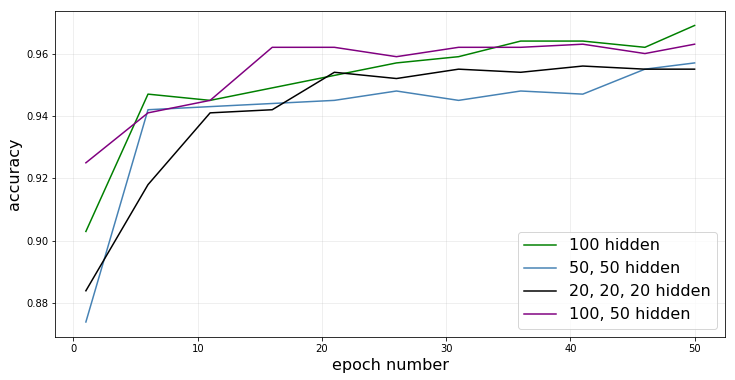

In [408]:
#validacc = nn1.vacc #MSE_hist(X_train, y_train, bhist)

epochs = [1,6,11,16,21,26,31,36,41,46,50] #MSE_hist(X_valid, y_valid, bhist)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12,6))
ax.plot(epochs,nnE0.vacc, color = "green", label="100 hidden")
ax.plot(epochs,nnE1.vacc, color = "steelblue", label="50, 50 hidden")
ax.plot(epochs,nnE2.vacc, color = "black", label="20, 20, 20 hidden")
ax.plot(epochs,nnE3.vacc, color = "purple", label="100, 50 hidden")

#ax.plot(mse_valid,color = "steelblue", label="valid")
#ax.plot(range(1,len(mse_valid)+1), mse_valid, color="green", label="train")
#ax.plot(range(1,len(mse_train)+1), mse_train, color="steelblue", label="train")
ax.set_xlabel("epoch number", fontsize=16)
ax.set_ylabel("accuracy", fontsize=16);
ax.grid(alpha=0.25)
ax.legend(loc="lower right", fontsize=16);

The best architecture seems to be the network with the single hidden layer that had 100 neurons with a final accuracy of $96.9%$ on validation. However, the 100,50 network achieved nearly the same accuracy, $96.2%$, in about 15 epochs so, in terms of the fastest to achieve a "high" accuracy the 100, 50 network was the best.

### [max 10 points] Extra Credit: Improving Network Performance 
***

See if you can get better performance by exploring advanced techniques.  Things you might try are: 

- Implementing **Mini-Batch** Stochastic Gradient Descent 
- Experimenting with different activation functions (like tanh and ReLU)
- Experimenting with different loss functions (like cross-entropy or softmax) 

For more detailed discussion of these techniques it'll be helpful to look at Chapter 3 of [Nielsen](http://neuralnetworksanddeeplearning.com/chap3.html). 

To receive the extra credit you should try at least a couple of the above and clearly describe what worked and what did not.  

**Important Note**: Don't do any of these things in the original `Network` class, because you'll almost certainly break the unit tests.  Copy the `Network` class from above and rename it `BetterNetwork` (or something) and modify the new class. 
